Followed through https://www.youtube.com/watch?v=4sZFkPw87ng

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv") # is like 780MB so deleted, can redownload above

df.head(10)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_7696\1478806984.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [3]:
df.shape

(7461195, 13)

In [4]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [5]:
# Clean data
# Only want USA, 50km or 50mi, 2020

dfFiltered = df[(df['Event distance/length'].isin(['50km', '50mi'])) & \
          (df['Year of event'] == 2020) & \
          (df['Event name'].str[-4:-1] == 'USA')]

In [6]:
dfFiltered['Event name'] = dfFiltered['Event name'].str[:-5]
# Gives an error but works ^^
dfFiltered.head()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_7696\1106455126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltered['Event name'] = dfFiltered['Event name'].str[:-5]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [7]:
# Clean age

dfFiltered['Athlete age'] = 2020 - dfFiltered['Athlete year of birth']
dfFiltered

C:\Users\Alexander\AppData\Local\Temp\ipykernel_7696\2509394053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltered['Athlete age'] = 2020 - dfFiltered['Athlete year of birth']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [8]:
dfFiltered['Athlete performance'] = dfFiltered['Athlete performance'].str[:-2]
dfFiltered

C:\Users\Alexander\AppData\Local\Temp\ipykernel_7696\2907642406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltered['Athlete performance'] = dfFiltered['Athlete performance'].str[:-2]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [9]:
dfFiltered = dfFiltered.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
dfFiltered.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [10]:
dfFiltered = dfFiltered.dropna()
dfFiltered.shape

dfFiltered[dfFiltered.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [11]:
dfFiltered.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
26284,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
26285,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
26286,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
26287,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [12]:
dfFiltered.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [13]:
dfFiltered['Athlete age'] = dfFiltered['Athlete age'].astype(int)

In [14]:
dfFiltered['Athlete average speed'] = dfFiltered['Athlete average speed'].astype(float)

In [15]:
dfFiltered.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [16]:
dfFiltered.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int32
dtype: object

In [17]:
dfFiltered = dfFiltered.rename(columns = {'Year of event':'year',
                                          'Event dates': 'race_day',
                                          'Event name': 'race_name',
                                          'Event distance/length': 'race_length',
                                          'Event number of finishers':'race_number_of_finishers',
                                          'Athlete performance':'athlete_performance',
                                          'Athlete gender':'athlete_gender',
                                          'Athlete average speed':'athlete_average_speed',
                                          'Athlete ID': 'athlete_id',
                                          'Athlete age':'athlete_age',
                                          })

In [18]:
dfFiltered.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [19]:
#reordering
print(dfFiltered.columns)
dfNew = dfFiltered[['race_day','race_name','race_length', 'race_number_of_finishers','athlete_id', 'athlete_gender','athlete_performance','athlete_average_speed','athlete_age']]
dfNew.head()

Index(['year', 'race_day', 'race_name', 'race_length',
       'race_number_of_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_average_speed', 'athlete_id', 'athlete_age'],
      dtype='object')


,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_performance,athlete_average_speed,athlete_age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,3:17:55,15.158,29
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,4:02:32,12.369,39
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,4:07:57,12.099,21
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,4:22:02,11.449,37
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,4:27:34,11.212,43


<Axes: xlabel='race_length', ylabel='Count'>

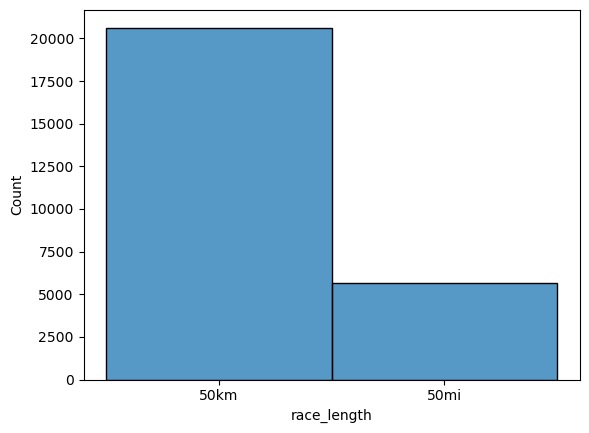

In [20]:
sns.histplot(dfNew['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

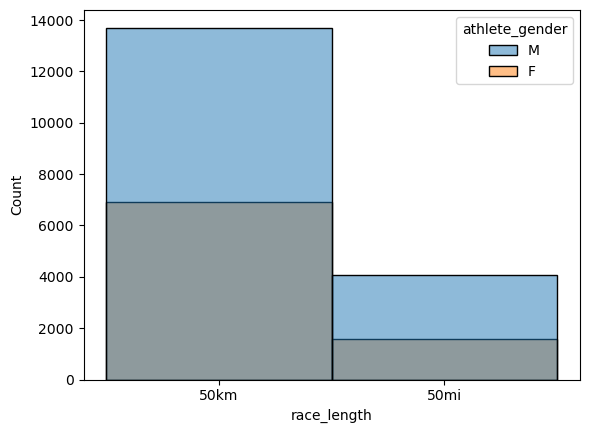

In [21]:
sns.histplot(dfNew, x='race_length',hue='athlete_gender')

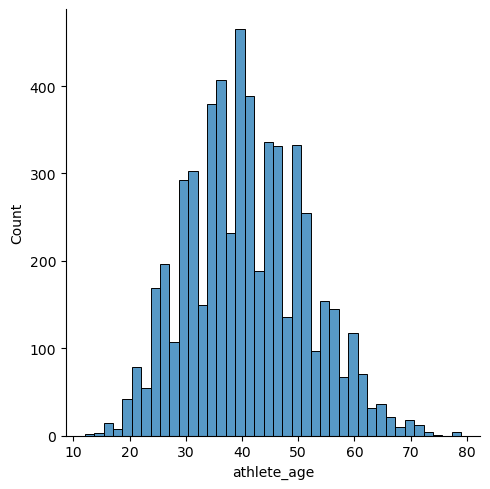

In [22]:
sns.displot(dfNew[dfNew['race_length']=='50mi']['athlete_age'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

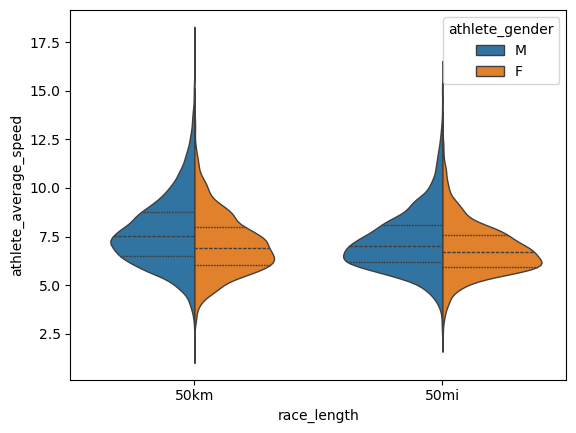

In [23]:
sns.violinplot(dfNew, x='race_length', y='athlete_average_speed', hue = 'athlete_gender', split=True, inner='quartz',linewidth=1)

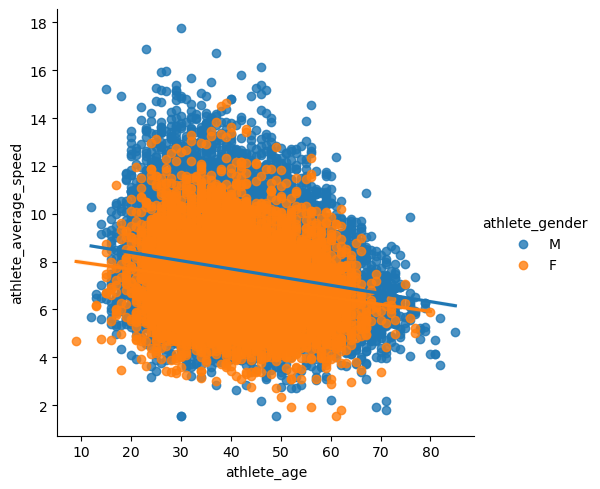

In [24]:
sns.lmplot(dfNew, x='athlete_age', y='athlete_average_speed', hue = 'athlete_gender')

In [25]:
dfNew.groupby(['race_length','athlete_gender'])['athlete_age'].count()

race_length  athlete_gender
50km         F                  6927
             M                 13705
50mi         F                  1581
             M                  4076
Name: athlete_age, dtype: int64

In [26]:
dfNew.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = True).query("count>19").head(15)

,mean,count
athlete_age,,
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


In [27]:
#dfNew[dfNew['race_day'].str[3:5].astype(int) > 11]
dfNew['race_month'] = dfNew['race_day'].str.split(".").str.get(1).astype(int)

In [28]:
dfNew['race_season'] = dfNew['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')
dfNew.head(25)

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_performance,athlete_average_speed,athlete_age,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,3:17:55,15.158,29,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,4:02:32,12.369,39,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,4:07:57,12.099,21,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,4:22:02,11.449,37,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,4:27:34,11.212,43,2,Winter
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810282,F,4:42:06,10.635,35,2,Winter
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,11739,M,4:49:20,10.369,59,2,Winter
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,80394,M,4:49:50,10.351,50,2,Winter
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,140909,F,4:51:00,10.309,45,2,Winter
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,753889,M,5:02:35,9.915,41,2,Winter


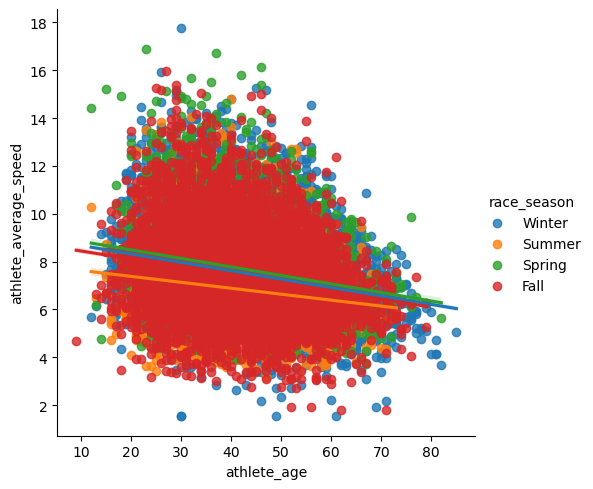

In [29]:

sns.lmplot(dfNew, x='athlete_age', y='athlete_average_speed', hue = 'race_season')

In [30]:
dfNew.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Spring,7.703542,3385
Winter,7.524506,11825
Fall,7.406619,8315
Summer,6.859274,2764


In [31]:
dfNew.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False)


,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.046989,1981
Summer,6.486055,843
